In [4]:
import numpy as np
import pandas as  pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
 


In [8]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
dfa = df[['Age' ,'Annual Income (k$)']]
dfa

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


In [16]:
scdfa = StandardScaler()
dfa_std = scdfa.fit_transform(dfa.astype(float))
dfa_std

array([[-1.42456879, -1.73899919],
       [-1.28103541, -1.73899919],
       [-1.3528021 , -1.70082976],
       [-1.13750203, -1.70082976],
       [-0.56336851, -1.66266033],
       [-1.20926872, -1.66266033],
       [-0.27630176, -1.62449091],
       [-1.13750203, -1.62449091],
       [ 1.80493225, -1.58632148],
       [-0.6351352 , -1.58632148],
       [ 2.02023231, -1.58632148],
       [-0.27630176, -1.58632148],
       [ 1.37433211, -1.54815205],
       [-1.06573534, -1.54815205],
       [-0.13276838, -1.54815205],
       [-1.20926872, -1.54815205],
       [-0.27630176, -1.50998262],
       [-1.3528021 , -1.50998262],
       [ 0.94373197, -1.43364376],
       [-0.27630176, -1.43364376],
       [-0.27630176, -1.39547433],
       [-0.99396865, -1.39547433],
       [ 0.51313183, -1.3573049 ],
       [-0.56336851, -1.3573049 ],
       [ 1.08726535, -1.24279661],
       [-0.70690189, -1.24279661],
       [ 0.44136514, -1.24279661],
       [-0.27630176, -1.24279661],
       [ 0.08253169,

# Théorie Mathématique : Standardisation des Données avec StandardScaler

La standardisation est une technique de transformation des données qui consiste à centrer et réduire les caractéristiques. Elle est particulièrement utile lorsque les données contiennent des caractéristiques ayant des échelles différentes, ce qui pourrait influencer les résultats des algorithmes sensibles aux distances (par exemple, les k-plus proches voisins, PCA, etc.).

## Formule Mathématique de la Standardisation

Pour chaque caractéristique \( x_j \) d’un échantillon de données, la standardisation s'effectue en appliquant la formule suivante :

$$
z_j = \frac{x_j - \mu_j}{\sigma_j}
$$

- \( z_j \) : valeur standardisée de la caractéristique \( j \).
- \( x_j \) : valeur initiale de la caractéristique \( j \).
- \( \mu_j \) : moyenne des valeurs de la caractéristique \( j \) dans le jeu de données.
- \( \sigma_j \) : écart-type des valeurs de la caractéristique \( j \) dans le jeu de données.

Ainsi, la standardisation transforme chaque caractéristique pour qu’elle ait une moyenne de 0 et un écart-type de 1, en garantissant que :

$$
\frac{1}{n} \sum_{i=1}^n z_{i,j} = 0
$$
$$
\frac{1}{n} \sum_{i=1}^n (z_{i,j} - \bar{z}_{j})^2 = 1
$$

où \( n \) est le nombre d’échantillons et \( \bar{z}_{j} = 0 \) par construction.

## Étapes du Calcul

1. **Calcul de la Moyenne** :
   - Pour chaque caractéristique \( j \), calculez la moyenne \( \mu_j \) :
     $$
     \mu_j = \frac{1}{n} \sum_{i=1}^n x_{i,j}
     $$
   
2. **Calcul de l'Écart-Type** :
   - Pour chaque caractéristique \( j \), calculez l'écart-type \( \sigma_j \) :
     $$
     \sigma_j = \sqrt{\frac{1}{n} \sum_{i=1}^n (x_{i,j} - \mu_j)^2}
     $$

3. **Application de la Transformation** :
   - Enfin, pour chaque valeur de la caractéristique \( j \), appliquez la transformation pour obtenir la valeur standardisée \( z_j \).

## Exemple

Supposons un vecteur de données d'une seule caractéristique :

- Données : \( x = [10, 15, 20] \)
- Moyenne (\( \mu \)) : 
  $$
  \mu = \frac{10 + 15 + 20}{3} = 15
  $$
- Écart-Type (\( \sigma \)) : 
  $$
  \sigma = \sqrt{\frac{(10 - 15)^2 + (15 - 15)^2 + (20 - 15)^2}{3}} = 5
  $$

Standardisation des valeurs de \( x \) :
- \( z_1 = \frac{10 - 15}{5} = -1 \)
- \( z_2 = \frac{15 - 15}{5} = 0 \)
- \( z_3 = \frac{20 - 15}{5} = 1 \)

Ainsi, le vecteur standardisé est \( z = [-1, 0, 1] \).

## Importance de la Standardisation

La standardisation permet d’aligner les échelles de toutes les caractéristiques, en améliorant la performance et la convergence de nombreux algorithmes d'apprentissage machine. Cela assure que chaque caractéristique contribue de manière équilibrée lors de l’entraînement du modèle.


# Théorie Mathématique : Algorithme K-Means

L'algorithme K-means est une méthode de clustering qui vise à partitionner un ensemble de données en \( k \) clusters (ou groupes) en minimisant la distance intra-cluster. Chaque cluster est défini par un centre, souvent appelé centroïde, qui est la moyenne de tous les points du cluster. L'objectif de K-means est d'optimiser la répartition des données pour minimiser la variabilité au sein de chaque cluster.

## Objectif de K-means

L'algorithme K-means cherche à minimiser la **somme des carrés des distances** entre chaque point et le centroïde de son cluster. Mathématiquement, cela revient à minimiser la fonction de coût suivante :

$$
J = \sum_{i=1}^k \sum_{x \in C_i} \| x - \mu_i \|^2
$$

- \( J \) : fonction de coût à minimiser, représentant l'inertie totale des clusters.
- \( k \) : nombre de clusters.
- \( C_i \) : le \( i \)-ème cluster.
- \( x \) : un point de données appartenant au cluster \( C_i \).
- \( \mu_i \) : le centroïde (moyenne) du cluster \( C_i \).
- \( \| x - \mu_i \|^2 \) : carré de la distance euclidienne entre le point \( x \) et le centroïde \( \mu_i \).

## Étapes de l'Algorithme K-means

1. **Initialisation des centroïdes** :
   - Choisissez \( k \) points aléatoires parmi les données pour servir de centroïdes initiaux, ou utilisez une méthode d'initialisation avancée comme K-means++ pour réduire les chances d'une mauvaise initialisation.

2. **Attribution des points aux clusters** :
   - Pour chaque point \( x \), calculez la distance entre \( x \) et chaque centroïde \( \mu_i \) et attribuez \( x \) au cluster dont le centroïde est le plus proche.

3. **Mise à jour des centroïdes** :
   - Après l'attribution des points, mettez à jour chaque centroïde \( \mu_i \) en calculant la moyenne des points assignés au cluster \( C_i \) :
     $$
     \mu_i = \frac{1}{|C_i|} \sum_{x \in C_i} x
     $$

4. **Répétition** :
   - Répétez les étapes 2 et 3 jusqu'à ce que les centroïdes ne changent plus de manière significative ou jusqu'à un nombre maximum d'itérations. À ce point, l'algorithme est considéré comme convergé.

## Convergence et Complexité

- L'algorithme K-means converge lorsque l'attribution des points aux clusters ne change plus ou que les centroïdes se stabilisent.

- La complexité de K-means est donnée par :

$$
O(n \cdot k \cdot i \cdot d)
$$

où :

  - \( n \) est le nombre de points de données,
  - \( k \) est le nombre de clusters,
  - \( i \) est le nombre d'itérations nécessaires pour la convergence,
  - \( d \) est la dimension de l'espace des données.


## Limitations de K-means

1. **Sensibilité aux valeurs initiales** : Une mauvaise initialisation peut entraîner une convergence vers un minimum local, plutôt que vers une solution optimale.
2. **Forme des clusters** : K-means fonctionne bien pour des clusters sphériques, mais peut mal fonctionner si les clusters ont des formes complexes ou des tailles très différentes.
3. **Valeur de \( k \)** : Le nombre de clusters \( k \) doit être déterminé à l'avance, ce qui peut être délicat. Des méthodes comme l'**Élbow Method** ou le **Silhouette Score** sont souvent utilisées pour trouver une bonne valeur de \( k \).

## Exemple Illustratif

Supposons un ensemble de données avec trois clusters naturels. L'algorithme K-means :

1. Place initialement les centroïdes aléatoirement.
2. Assigne chaque point au centroïde le plus proche.
3. Recalcule les centroïdes pour chaque cluster.
4. Répète le processus jusqu'à stabilisation.

Le résultat final est un ensemble de clusters avec des centroïdes bien positionnés pour minimiser la distance intra-cluster.

## Applications de K-means

K-means est largement utilisé pour :
- La segmentation d'images,
- La réduction de dimensionnalité (ex : quantification vectorielle),
- Le clustering de documents,
- La segmentation de clients en marketing.


C:\Users\saifa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\saifa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fil

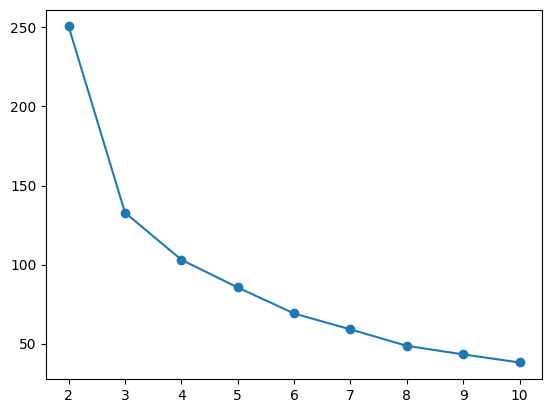

In [17]:
#Appliquer kmeans
cluster_range=[2,3,4,5,6,7,8,9,10]
inertie=[]

for c in cluster_range:
    kmeans=KMeans(init='k-means++',n_clusters=c).fit(dfa_std)
    inertie.append(kmeans.inertia_)
    
#print(inertie)

#dessiner les inerties calculé
plt.Figure()
plt.plot(cluster_range,inertie,marker='o')
plt.show()

In [20]:
#On part sur 4 clusters
kmeans=KMeans(n_clusters=4).fit(dfa_std)

#affecter les cluster à la varialb e labels
labels=kmeans.labels_

#créer un dataset qui contient les valeurs de dfa_std
new_dfa=pd.DataFrame(data=dfa_std,columns=['age','revenu_annuel'])

#rajouter les labels à mon dataset dfa_std
new_dfa['labels_kmeans']=labels

new_dfa

,age,revenu_annuel,labels_kmeans
0,-1.424569,-1.738999,1
1,-1.281035,-1.738999,1
2,-1.352802,-1.700830,1
3,-1.137502,-1.700830,1
4,-0.563369,-1.662660,1
...,...,...,...
195,-0.276302,2.268791,3
196,0.441365,2.497807,3
197,-0.491602,2.497807,3
198,-0.491602,2.917671,3


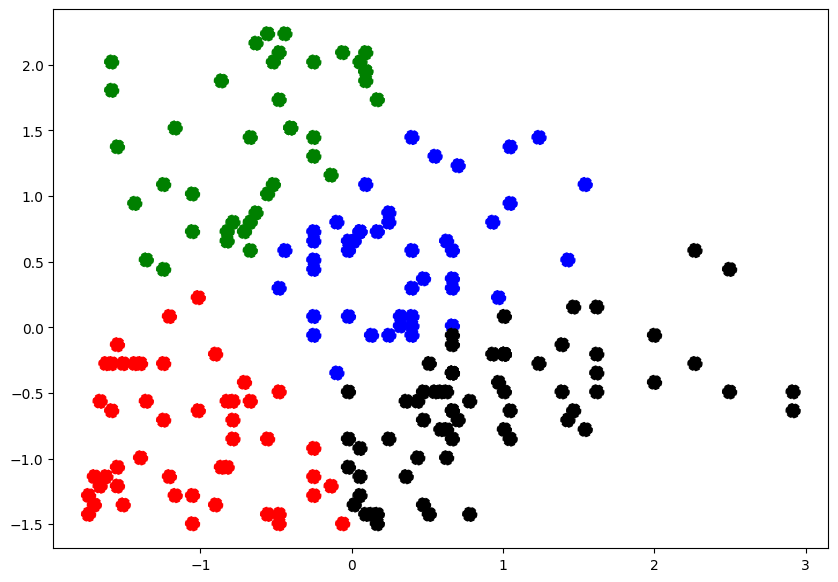

In [24]:
#visualiser les cluster en 2dimesions
fig,ax=plt.subplots(figsize=[10,7])
plt.scatter(new_dfa['revenu_annuel'][new_dfa['labels_kmeans']==0],new_dfa['age'][new_dfa['labels_kmeans']==0],
            color='blue',s=100,linestyle='--')
plt.scatter(new_dfa['revenu_annuel'][new_dfa['labels_kmeans']==1],new_dfa['age'][new_dfa['labels_kmeans']==1],
            color='red',s=100,linestyle='--')
plt.scatter(new_dfa['revenu_annuel'][new_dfa['labels_kmeans']==2],new_dfa['age'][new_dfa['labels_kmeans']==2],
            color='green',s=100,linestyle='--')
plt.scatter(new_dfa['revenu_annuel'][new_dfa['labels_kmeans']==3],new_dfa['age'][new_dfa['labels_kmeans']==3],
            color='black',s=100,linestyle='--')

plt.show()